# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above. It will only work with these files.

---
---

### 41.1 Loading and viewing the data

Here is URL to sample file for Baptist Health:
* https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx'

data = pd.read_excel(url, sheet_name='Sheet1', skiprows=3)

In [ ]:
data.shape

(3864, 19)

In [ ]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [ ]:
data.head()

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

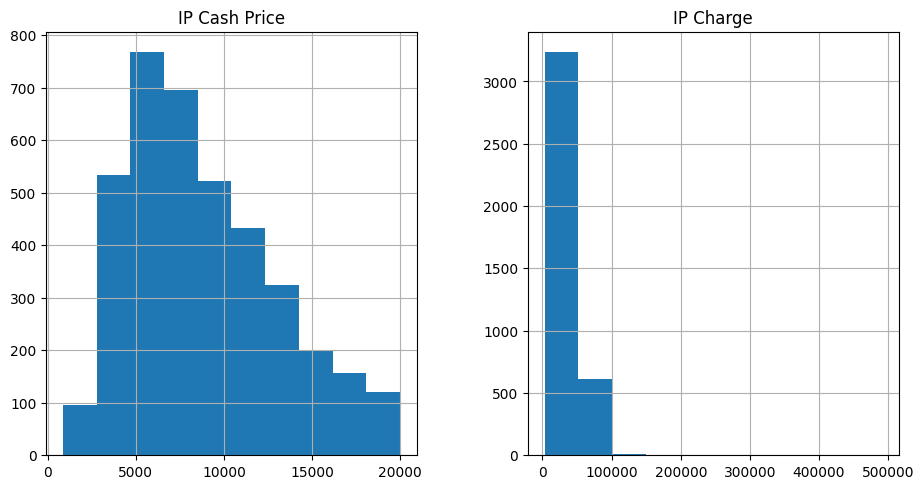

In [ ]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

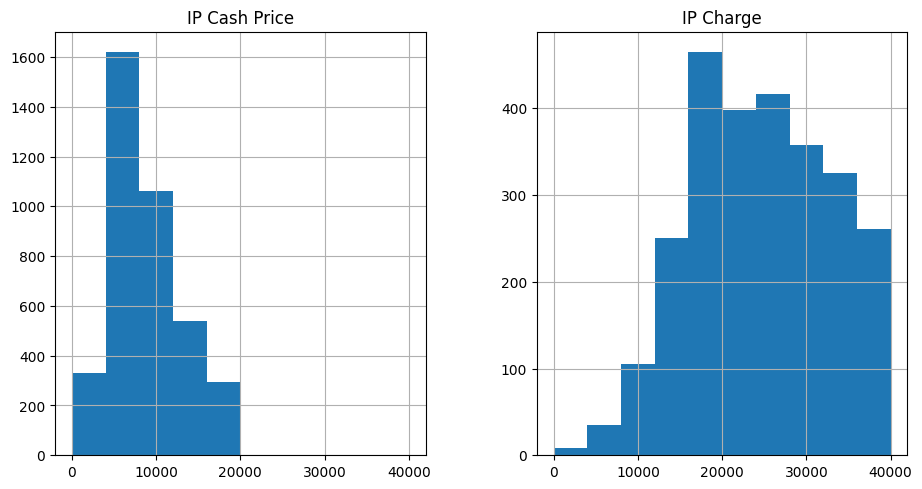

In [ ]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

In [ ]:
high_cost_filter = data['IP Charge'] > 100000
data.loc[high_cost_filter]

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
800,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ALLWELL [15100],120026.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
858,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ALLWELL [15100],102435.46,16684.09,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
934,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 461,NaN,NaN,MS461,Bilateral Or Multiple Major Joint Procedures O...,1,ALLWELL [15100],121126.29,NaN,8741.25,9225.00,NaN,0,NaN,NaN,NaN,NaN
1171,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 802,NaN,NaN,MS802,Other O.R. Procedures Of The Blood And Blood F...,1,ALLWELL [15100],143667.09,NaN,9725.00,10204.12,10204.12,0,NaN,NaN,NaN,NaN
1264,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ALLWELL [15100],480809.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN
1945,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 037,NaN,NaN,MS037,Extracranial Procedures With McC,1,ARKANSAS TOTAL CARE [40700],123035.47,NaN,17816.08,39275.00,17816.08,0,NaN,NaN,NaN,NaN
2091,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ARKANSAS TOTAL CARE [40700],121981.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2138,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 333,NaN,NaN,MS333,Rectal Resection With Cc,1,ARKANSAS TOTAL CARE [40700],128929.41,NaN,12824.58,26704.23,15975.34,0,NaN,NaN,NaN,NaN
2149,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ARKANSAS TOTAL CARE [40700],104304.46,NaN,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
2192,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 408,NaN,NaN,MS408,Biliary Tract Procedures Except Only Cholecyst...,1,ARKANSAS TOTAL CARE [40700],108898.78,NaN,19861.16,22240.28,19861.16,0,NaN,NaN,NaN,NaN


### Question:

**What do you observe from the histograms above?**

From the first two above, The histogram show the distribution of values of IP cash price and IP charge, The y-axis represent the frequency while the x-axis represent the price values, There is less stability in pricing option and on IP charge, there are some initial plots that are not visible which lies some outlier values with extremely high charges that's why there are very tall bars in the left hand side.




On the second part, a significant part of the records show that the low range has a peak of 5000 and is a left skewed(negatively distributed) The mode is higher than the median while the median is higher than the mean. i also observed extremely high cost outliers too on the IP charge.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

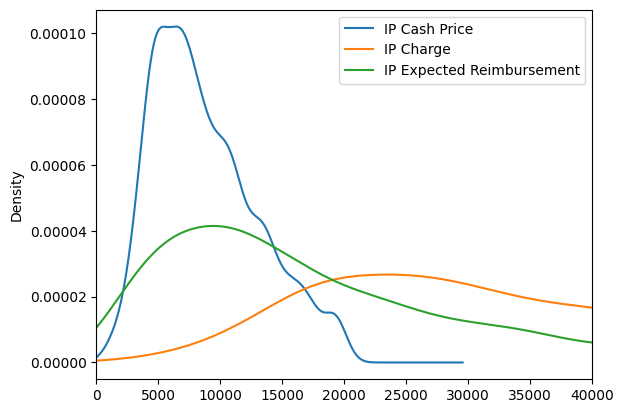

In [ ]:

graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

My response
 My observation is On this graph the density runs from 0.00000 - 0.00010, value on x-axis is 5000-40000. The blue line climbs to 0.00010 and drops at value of 10000 down to 25000 ending at 29000, green start at 0.00001 and climbs to 0.00004 on y axis and 10000 on x axis begins to decline to 40000 while orange line starts increasing at 10000, its peak is 24000 on x axis and 0.00003 on y-axis and starts to decline at 24000 till 40000
showing that there are relatively lower charges but higher reimbursement.


---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [ ]:
data['Payer'].value_counts()

ALLWELL [15100]                      650
ARKANSAS TOTAL CARE [40700]          650
AETNA [65000]                        641
AR BLUE CROSS BLUE SHIELD [25001]    641
HEALTHSCOPE [95700]                  641
MULTIPLAN                            641
Name: Payer, dtype: int64

In [ ]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

Payer
AETNA [65000]                        372
ALLWELL [15100]                      519
AR BLUE CROSS BLUE SHIELD [25001]    450
ARKANSAS TOTAL CARE [40700]          404
HEALTHSCOPE [95700]                  641
MULTIPLAN                            641
Name: IP Expected Reimbursement, dtype: int64

Payer
AETNA [65000]                        Axes(0.125,0.11;0.775x0.77)
ALLWELL [15100]                      Axes(0.125,0.11;0.775x0.77)
AR BLUE CROSS BLUE SHIELD [25001]    Axes(0.125,0.11;0.775x0.77)
ARKANSAS TOTAL CARE [40700]          Axes(0.125,0.11;0.775x0.77)
HEALTHSCOPE [95700]                  Axes(0.125,0.11;0.775x0.77)
MULTIPLAN                            Axes(0.125,0.11;0.775x0.77)
Name: IP Expected Reimbursement, dtype: object

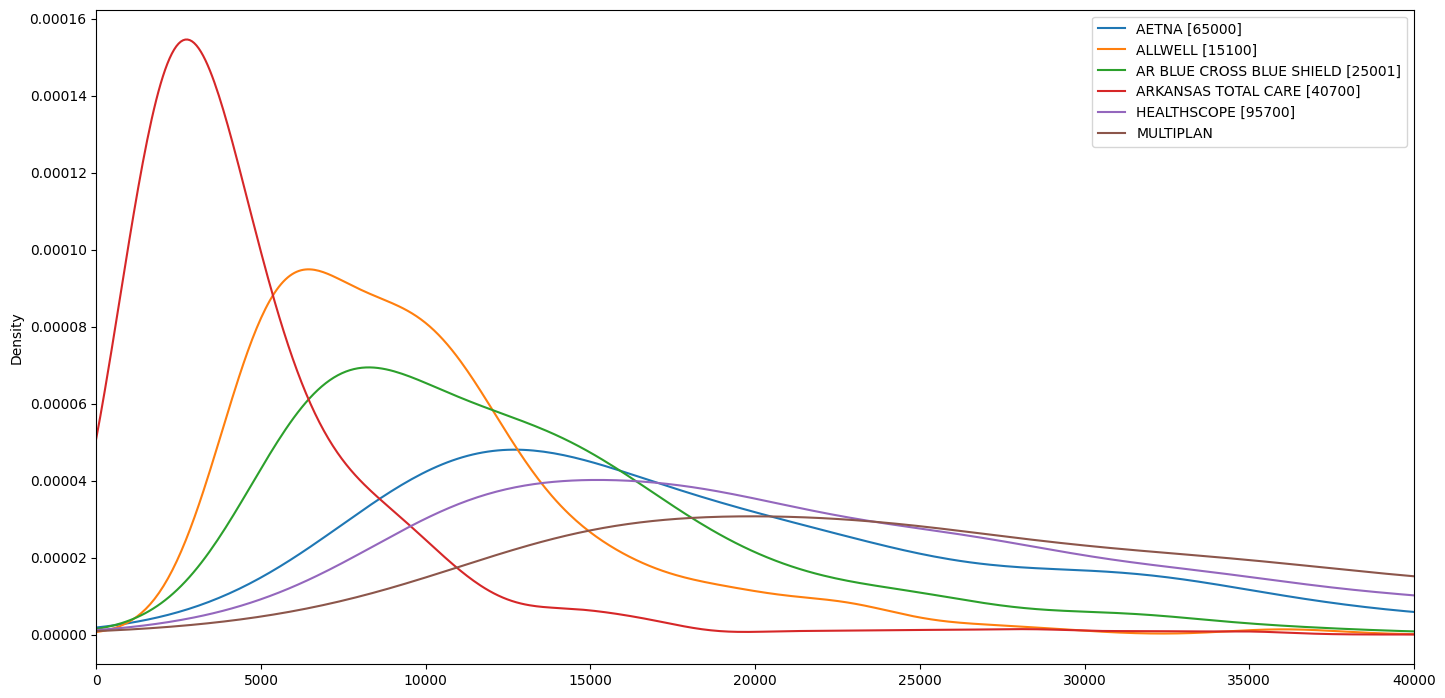

In [ ]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


For Arkansas(Red line),it's different from the rest, the reimbursement are concentrated on the low area of the x-axis showing a low reimbursement rate.
AETNA, ALLWELL, MULTIPLAN AND AR BLUE are more on the higher end of the x-axis and show very high reimbursement rates ulike Arkansas. These are what i observe about the reimbursement patterns.

B) What this particular plans shows is that more patients are likey to enroll in ARKANSAS plans because it's pretty much affordable,has a plan with a low reimbursement rate and covers more patients who are low income earners.
AETNA, MULTIPLAN, ALLWELL, and others are  expensive and less patients are likely not going to want go enroll because it isn't affordable and the reimbursement rates are high.

---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

<Axes: xlabel='IP Charge', ylabel='IP Expected Reimbursement'>

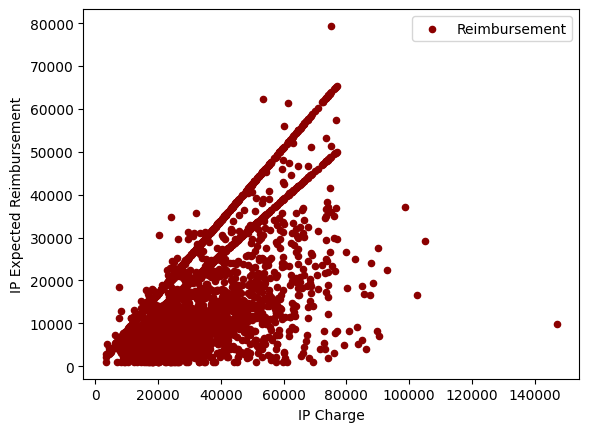

In [ ]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

/var/folders/y_/xxx3y_g51lq6y2lhcry0dznc0000gn/T/ipykernel_83068/4001846673.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (payer, prices) in enumerate(groups):


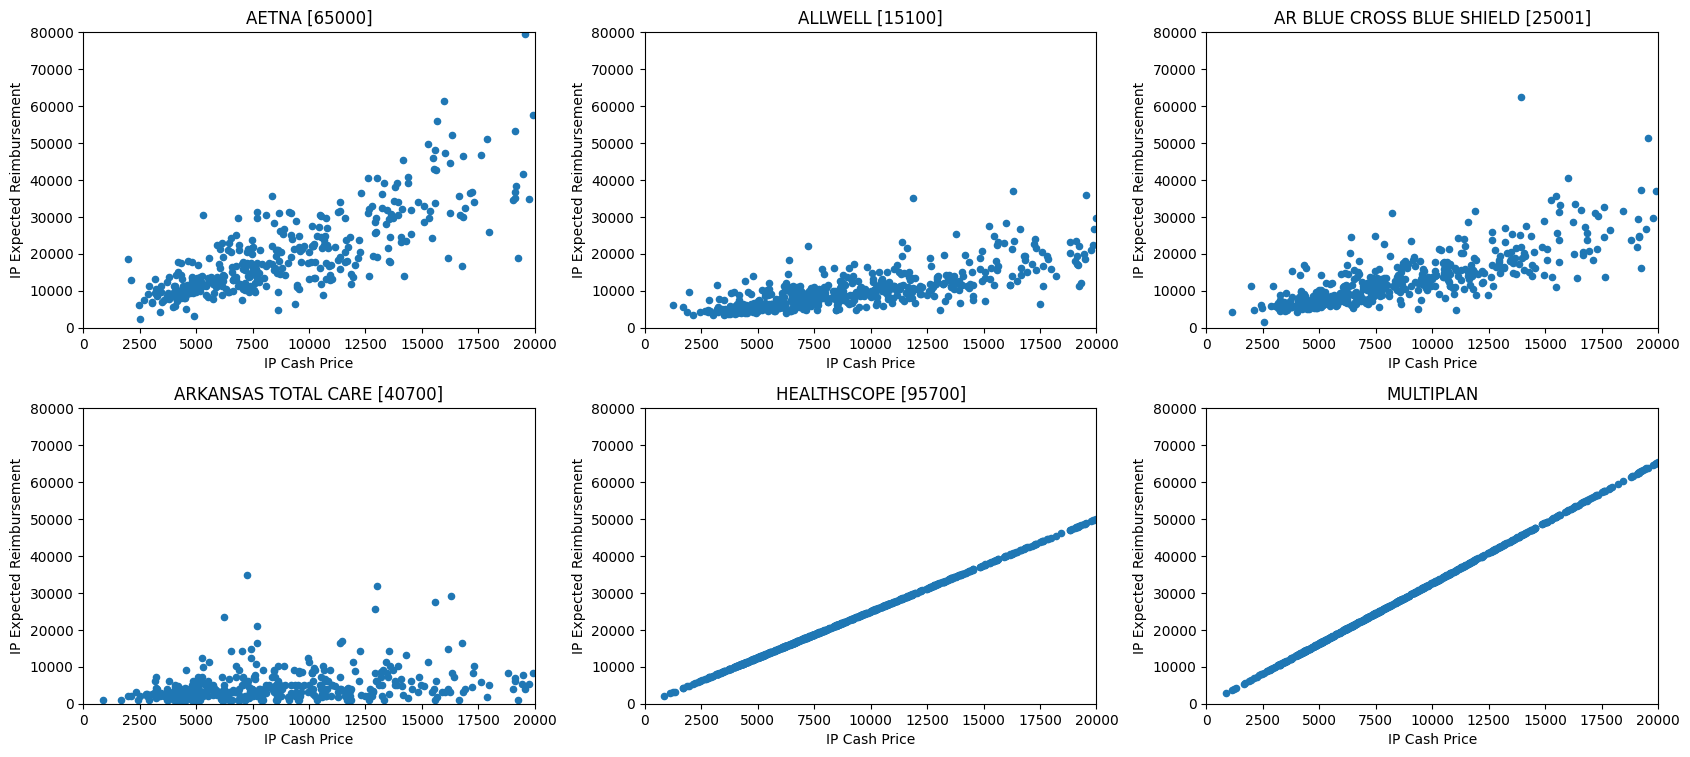

In [ ]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

My response

Between the IP CASH PRICE and the insurance paid prices, there's a strong positive correlation between the two variables,the ip cash price billed to insurance increases and the expected reimbursement also increases which is the amount the hospital is expecting to receive from insurance also increases which means higher charges comes with higher reimbursements.

There's also less corelation among other subplots which the data points are scattered evenly, this means payment vary by payer meaning that theere is no strong relationship between what the patients pay and what the hospital is expecting to receive.




---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name = fn, length = len(uploaded[fn])))

Saving data_covid.csv to data_covid.csv
User uploaded file "data_covid.csv" with length 861037 bytes


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('data_covid.csv')
data.head()

,Data as of,Start Date,End Date,State,County Name,Urban Rural Code,FIPS State,FIPS County,FIPS Code,Indicator,...,COVID-19 Deaths,Non-Hispanic White,Non-Hispanic Black,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic,Other,Urban Rural Description,Footnote
0,09/27/2023,01/01/2020,09/23/2023,AK,Anchorage Municipality,3,2,20,2020,Distribution of all-cause deaths (%),...,787,0.568,0.044,0.216,0.058,0.030,0.033,0.050,Medium metro,NaN
1,09/27/2023,01/01/2020,09/23/2023,AK,Anchorage Municipality,3,2,20,2020,Distribution of COVID-19 deaths (%),...,787,0.452,0.037,0.255,0.111,0.074,0.038,0.033,Medium metro,NaN
2,09/27/2023,01/01/2020,09/23/2023,AK,Anchorage Municipality,3,2,20,2020,Distribution of population (%),...,787,0.564,0.052,0.083,0.098,0.031,0.095,0.077,Medium metro,NaN
3,09/27/2023,01/01/2020,09/23/2023,AK,Fairbanks North Star Borough,4,2,90,2090,Distribution of all-cause deaths (%),...,214,0.710,0.024,0.173,0.020,NaN,0.027,0.044,Small metro,One or more data cells have counts between 1-9...
4,09/27/2023,01/01/2020,09/23/2023,AK,Fairbanks North Star Borough,4,2,90,2090,Distribution of COVID-19 deaths (%),...,214,0.626,NaN,0.257,NaN,NaN,NaN,0.056,Small metro,One or more data cells have counts between 1-9...


from matplotlib import pyplot as plt
_df_0['Urban Rural Code'].plot(kind='hist', bins=20, title='Urban Rural Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['FIPS County'].plot(kind='hist', bins=20, title='FIPS County')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['FIPS Code'].plot(kind='hist', bins=20, title='FIPS Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Non-Hispanic White'].plot(kind='hist', bins=20, title='Non-Hispanic White')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('County Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Indicator').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Total deaths').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('COVID-19 Deaths').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Urban Rural Code', y='FIPS County', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='FIPS County', y='FIPS Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='FIPS Code', y='Non-Hispanic White', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Non-Hispanic White', y='Non-Hispanic Black', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Start Date']
  ys = series['Non-Hispanic White']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Start Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('County Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='County Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Start Date')
_ = plt.ylabel('Non-Hispanic White')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Start Date']
  ys = series['Non-Hispanic White']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Start Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Indicator')):
  _plot_series(series, series_name, i)
  fig.legend(title='Indicator', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Start Date')
_ = plt.ylabel('Non-Hispanic White')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Start Date']
  ys = series['Non-Hispanic White']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Start Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Total deaths')):
  _plot_series(series, series_name, i)
  fig.legend(title='Total deaths', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Start Date')
_ = plt.ylabel('Non-Hispanic White')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Start Date']
  ys = series['Non-Hispanic White']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('Start Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('COVID-19 Deaths')):
  _plot_series(series, series_name, i)
  fig.legend(title='COVID-19 Deaths', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Start Date')
_ = plt.ylabel('Non-Hispanic White')

from matplotlib import pyplot as plt
_df_16['Urban Rural Code'].plot(kind='line', figsize=(8, 4), title='Urban Rural Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['FIPS County'].plot(kind='line', figsize=(8, 4), title='FIPS County')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['FIPS Code'].plot(kind='line', figsize=(8, 4), title='FIPS Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Non-Hispanic White'].plot(kind='line', figsize=(8, 4), title='Non-Hispanic White')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Indicator'].value_counts()
    for x_label, grp in _df_20.groupby('County Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('County Name')
_ = plt.ylabel('Indicator')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Total deaths'].value_counts()
    for x_label, grp in _df_21.groupby('Indicator')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Indicator')
_ = plt.ylabel('Total deaths')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['COVID-19 Deaths'].value_counts()
    for x_label, grp in _df_22.groupby('Total deaths')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Total deaths')
_ = plt.ylabel('COVID-19 Deaths')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Urban Rural Description'].value_counts()
    for x_label, grp in _df_23.groupby('COVID-19 Deaths')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('COVID-19 Deaths')
_ = plt.ylabel('Urban Rural Description')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['County Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Urban Rural Code', y='County Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['Indicator'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Urban Rural Code', y='Indicator', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Total deaths'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='Urban Rural Code', y='Total deaths', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['COVID-19 Deaths'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='Urban Rural Code', y='COVID-19 Deaths', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

TWO VISUALIZATIONS ON THE DATA CHOSEN

Plot a Histogram


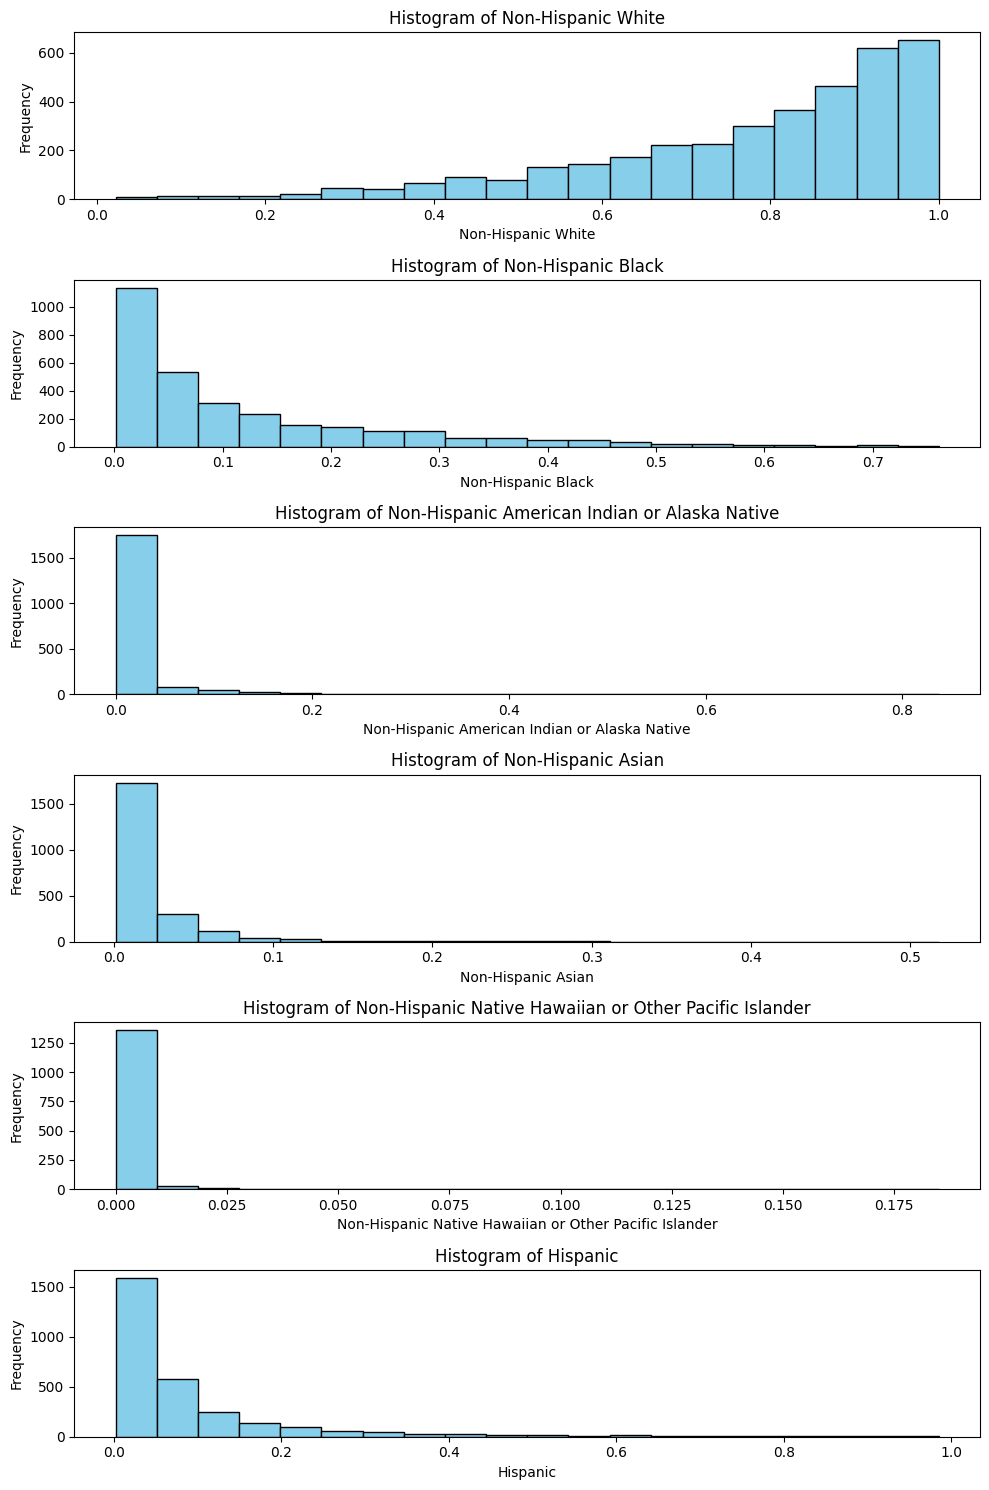

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data_covid.csv')

# List of columns i want to analyze include
columns_of_interest = [
    'Non-Hispanic White',
    'Non-Hispanic Black',
    'Non-Hispanic American Indian or Alaska Native',
    'Non-Hispanic Asian',
    'Non-Hispanic Native Hawaiian or Other Pacific Islander',
    'Hispanic',
]

# Create subplots
fig, axes = plt.subplots(nrows=len(columns_of_interest), ncols=1, figsize=(10, 15))

# Loop through each column and plot histogram
for i, column in enumerate(columns_of_interest):
    axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

### Observations #1

_Double-click this text and then edit it to put in your observations_

The Histogram shows the distribution of covid 19 deaths among different races, The total cumulative data show Non hispanic white, Black, Hispanic, American Indian or Alaska Native (AIAN), and Native Hawaiian or Other Pacific Islander (NHOPI) people have experienced lower rates of COVID-19 cases and deaths compared to White.
The Histogram of Non-hispanic white is negatively skewed showing the relatively high distribution of covid among the NHW compared to the other population.



2) MAKE SCATTER PLOTS AS SECOND VISUALIZATION


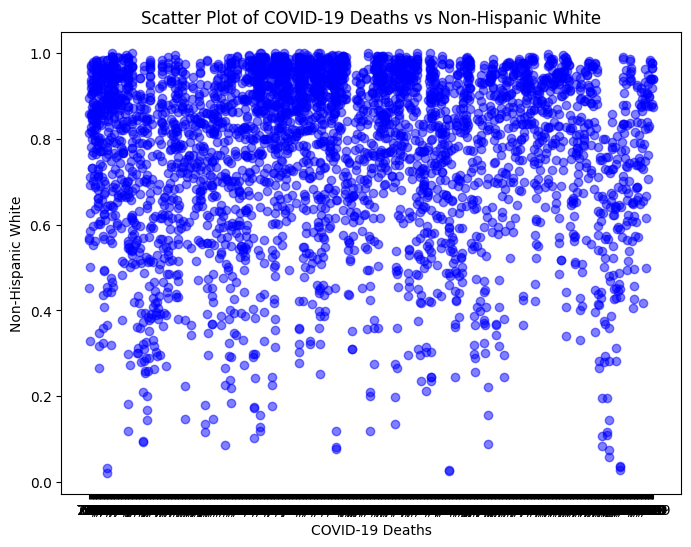

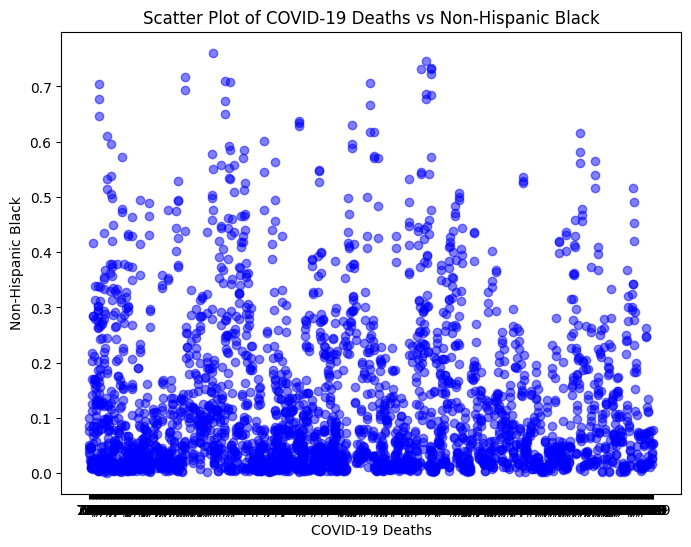

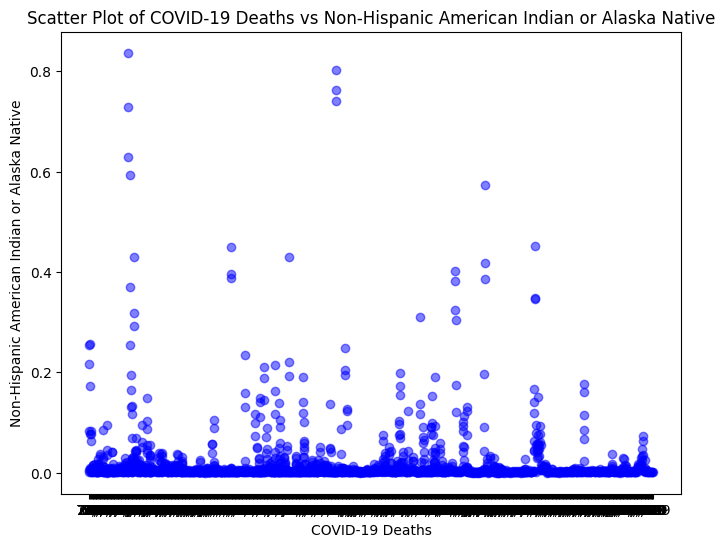

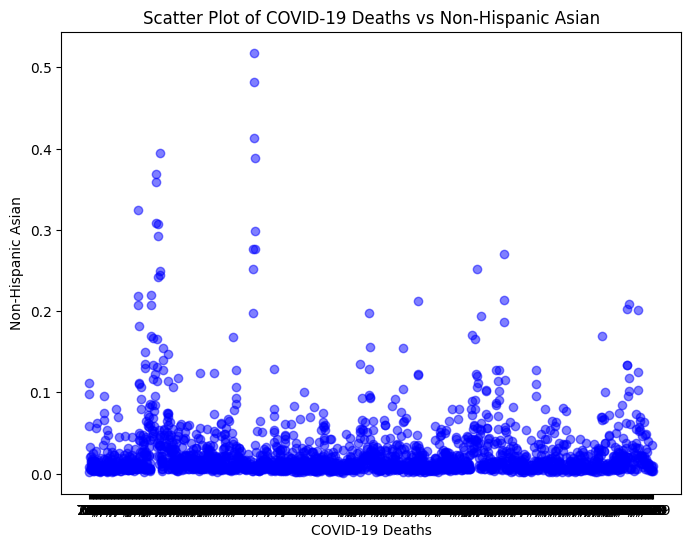

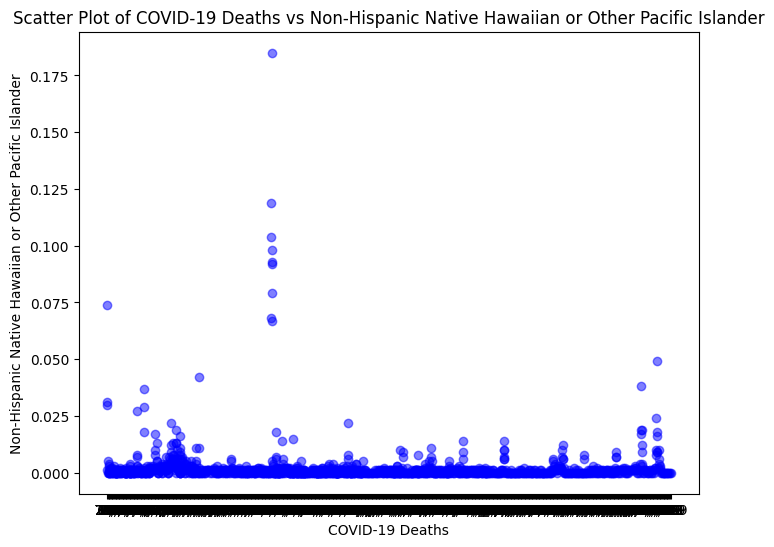

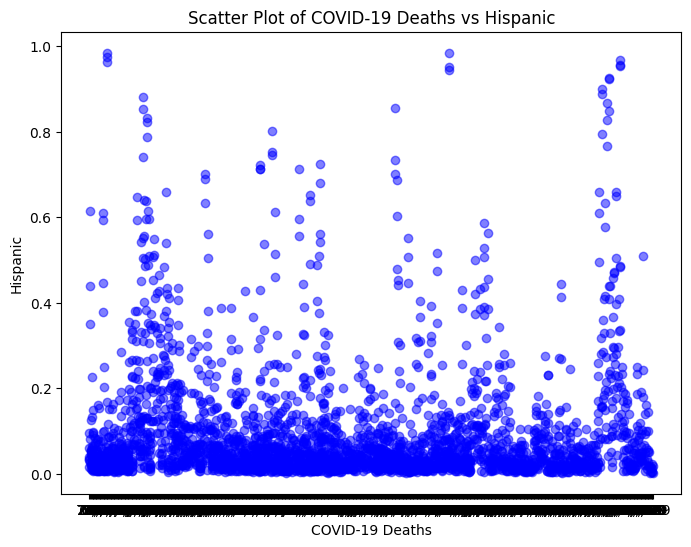

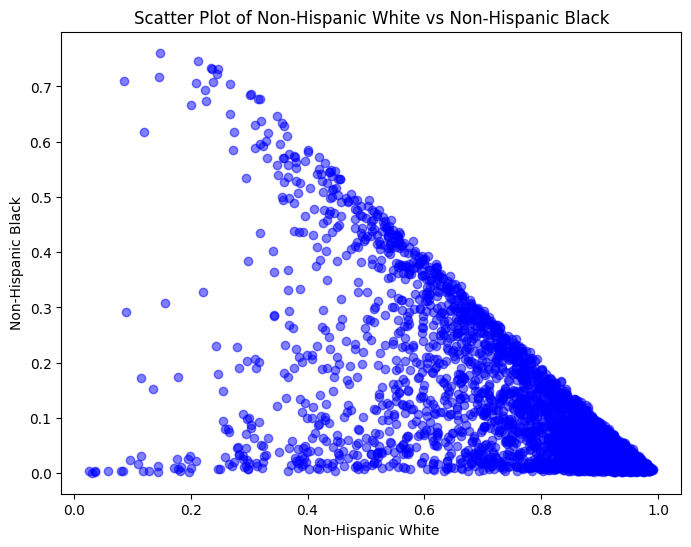

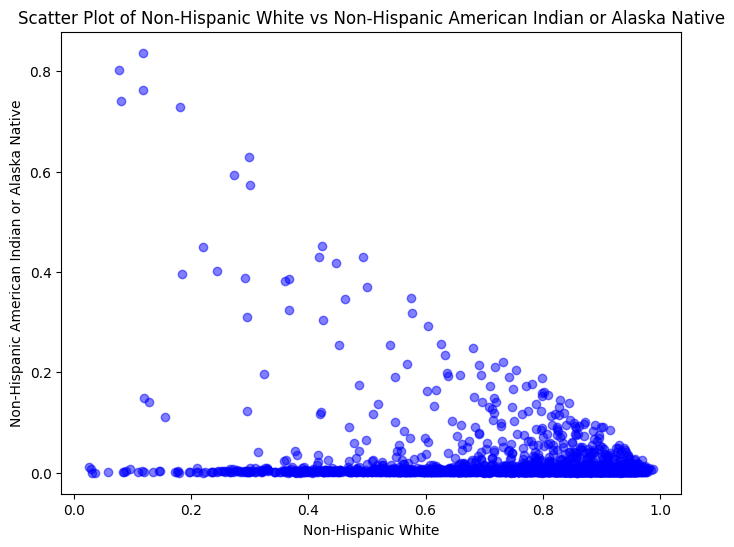

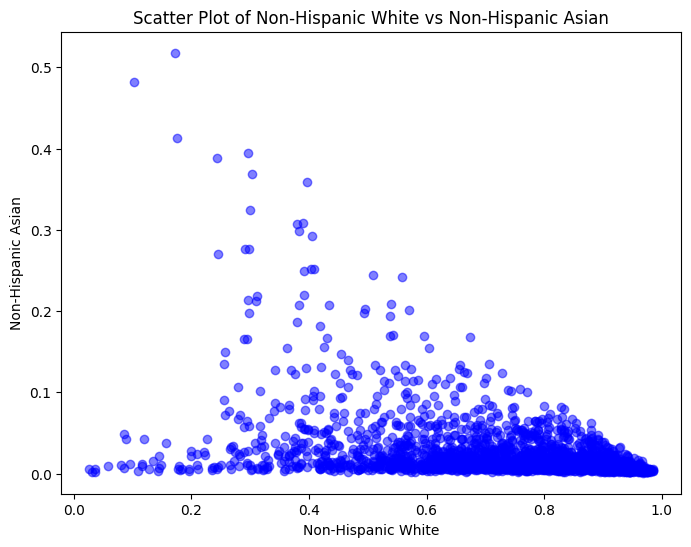

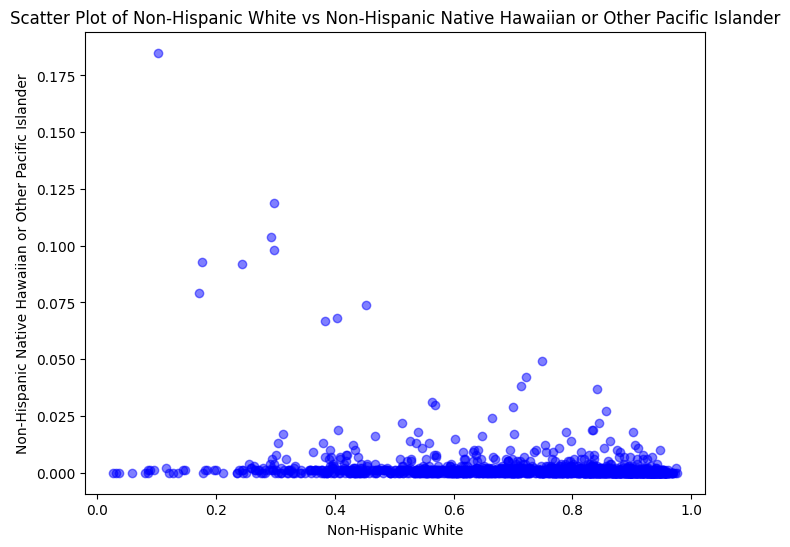

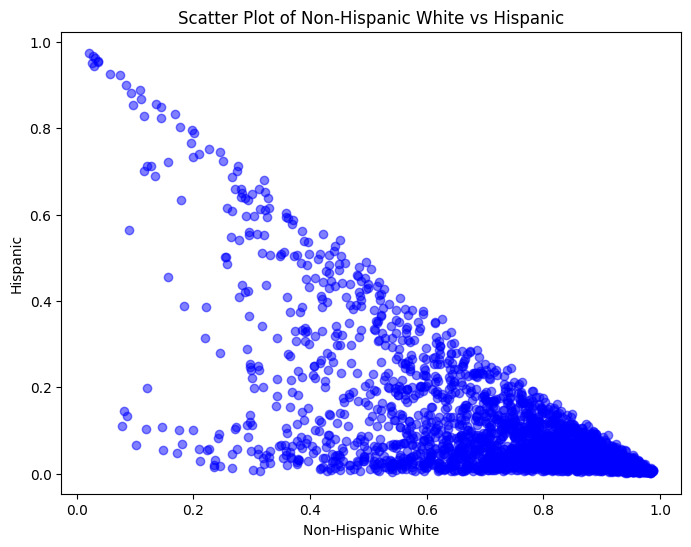

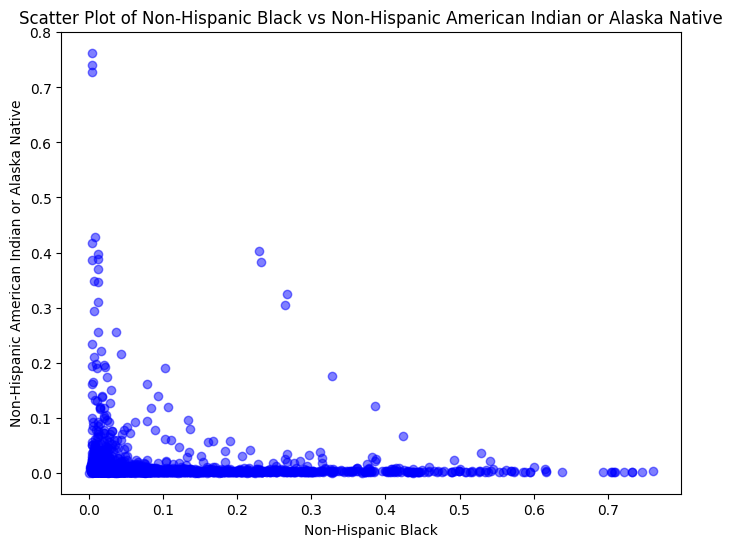

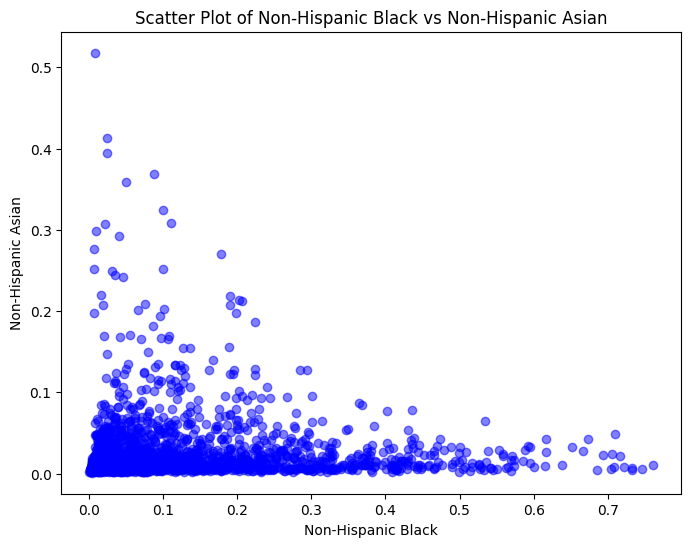

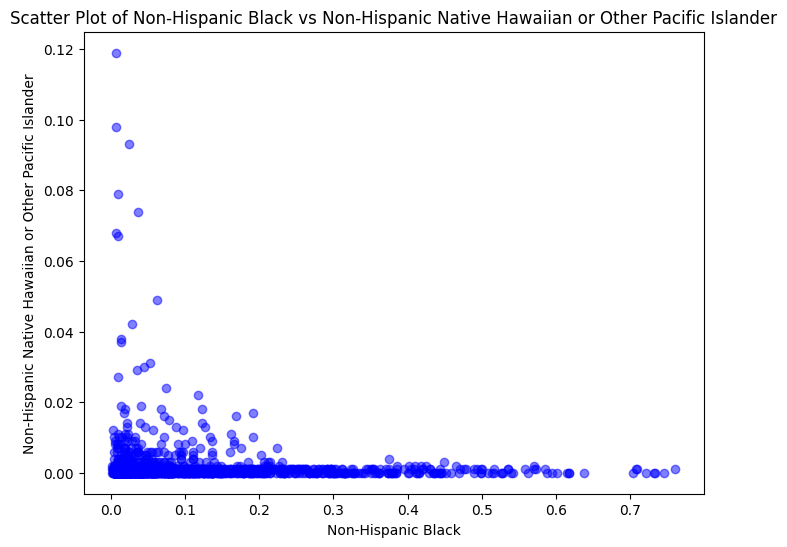

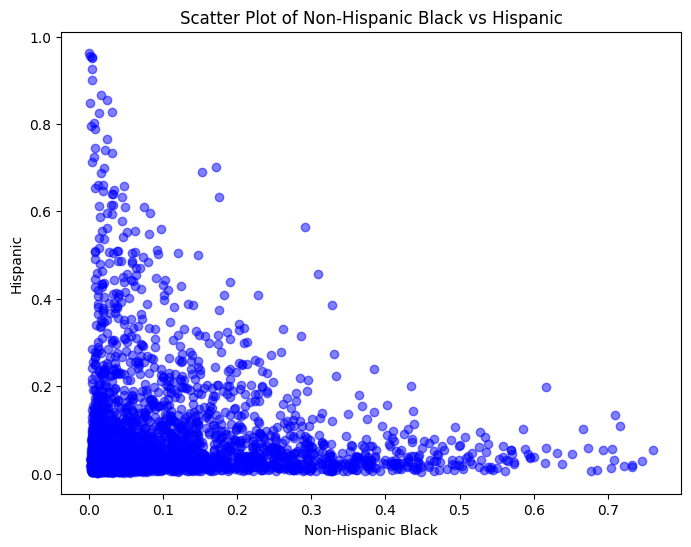

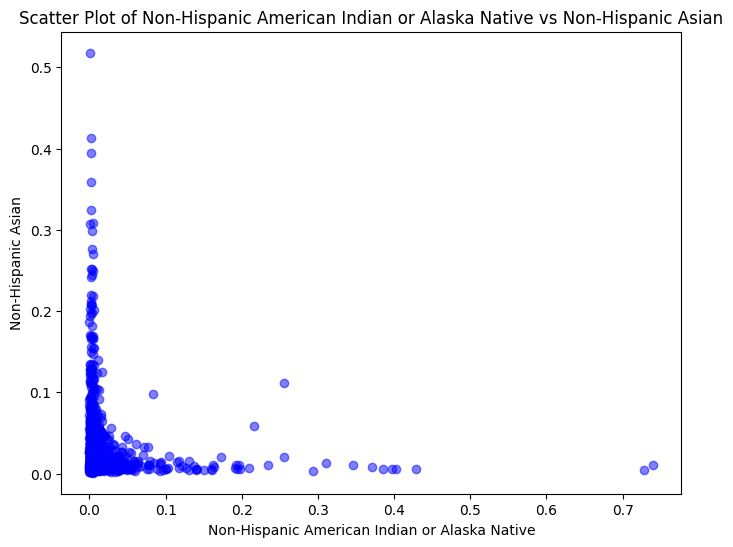

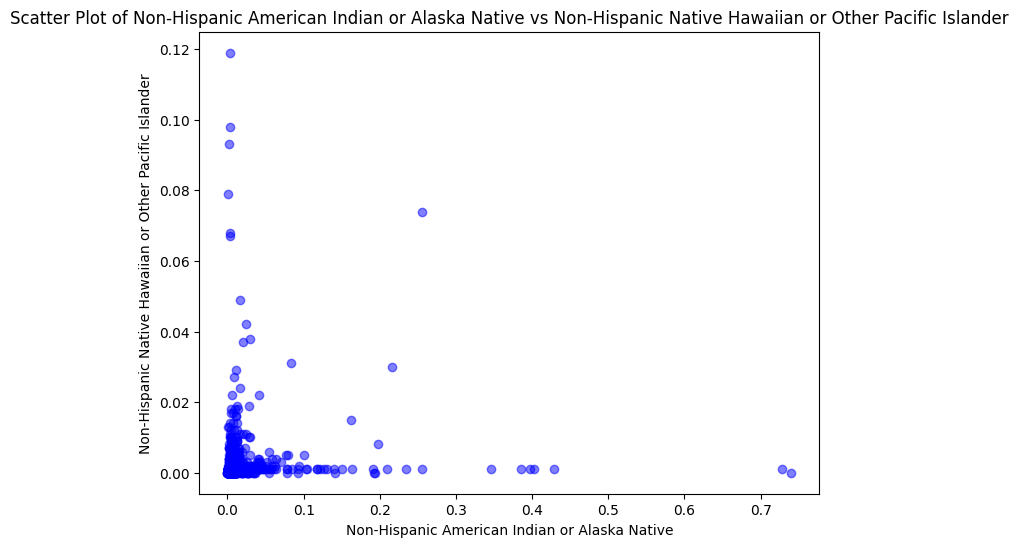

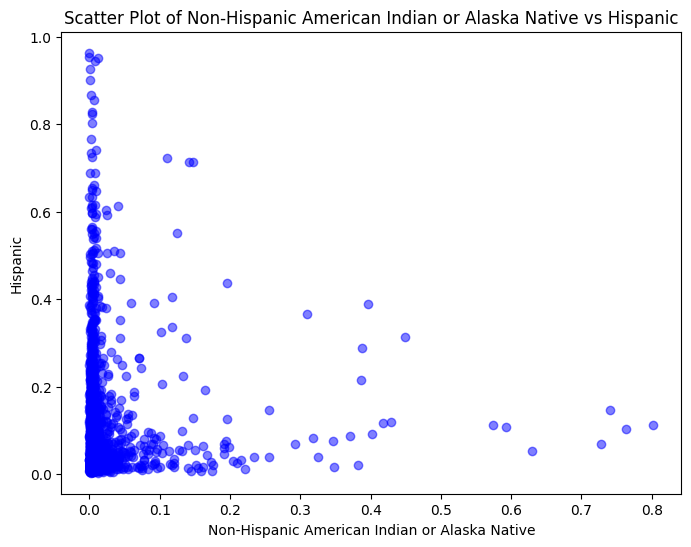

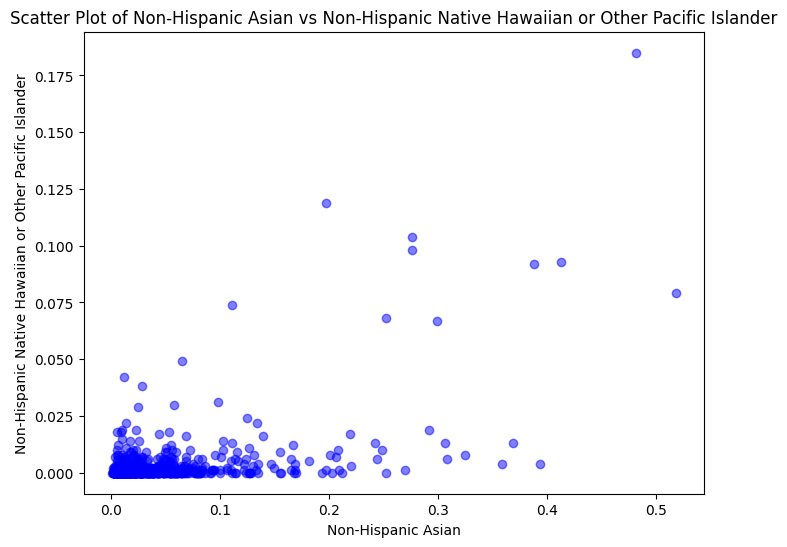

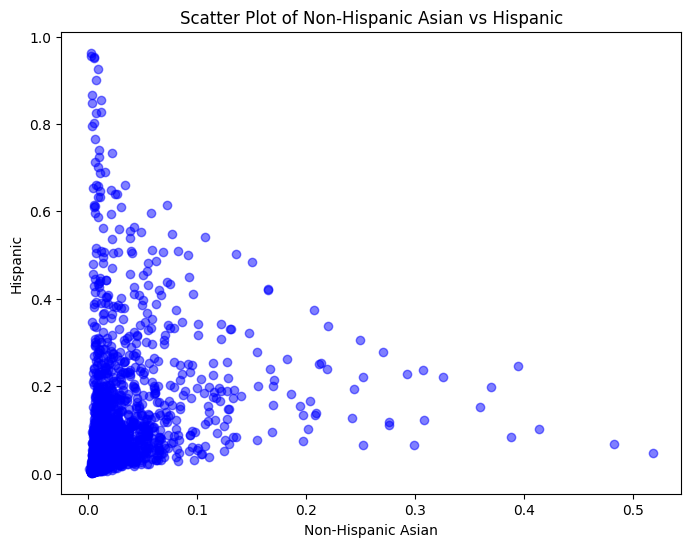

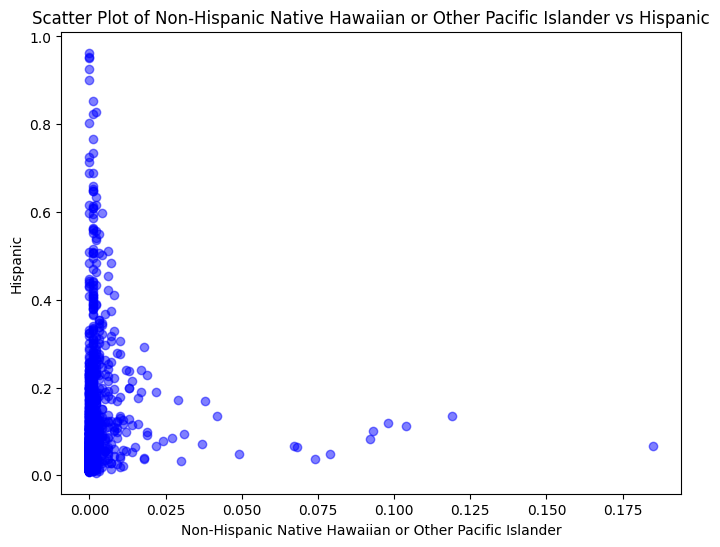

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data_covid.csv')

# Selecting continuous variables
continuous_variables = [
    'COVID-19 Deaths',
    'Non-Hispanic White',
    'Non-Hispanic Black',
    'Non-Hispanic American Indian or Alaska Native',
    'Non-Hispanic Asian',
    'Non-Hispanic Native Hawaiian or Other Pacific Islander',
    'Hispanic',
]

# create individual scatter plots for each pair of continuous variables
for i in range(len(continuous_variables)):
    for j in range(i+1, len(continuous_variables)):
        plt.figure(figsize=(8, 6))
        plt.scatter(df[continuous_variables[i]], df[continuous_variables[j]], alpha=0.5, color='blue')
        plt.title(f'Scatter Plot of {continuous_variables[i]} vs {continuous_variables[j]}')
        plt.xlabel(continuous_variables[i])
        plt.ylabel(continuous_variables[j])
        plt.show()


This scatter plots shows the difference in the distribution of covid 19 deaths among different races, The total cumulative data show Non hispanic white, Black, Hispanic, American Indian or Alaska Native (AIAN), and Native Hawaiian or Other Pacific Islander (NHOPI) The rest of the population of people have experienced lower rates of COVID-19 cases and deaths compared to Non-hispanic White from the plots above visually exploring the relationships and associations between Non -hispanic white and others, Non-hispanic white vs black also caught my attention in the how evenly distributed the plot were.
Amongst the NHB population,Noticeable patterns were observed in NHOPI and NHAANH having both pairs of continuous variables in the different racial ethnic groups.



---



## Submitting Your Work

As usual, submit your work using the "Save to GitHub" option